# Pandas库学习

结合[Pandas中文网](https://www.pypandas.cn/docs/getting_started/10min.html#%E9%80%89%E6%8B%A9) 进行学习

## Series类型基本操作

In [26]:
import pandas as pd

In [2]:
b = pd.Series([9,8,7,6],['a','b','c','d'])

In [4]:
b

a    9
b    8
c    7
d    6
dtype: int64

### 自动索引和自定义索引

In [6]:
b['b']

8

In [7]:
b[1]

8

自动索引和自定义索引可以并存，但不能混用

### 常用方法or属性

In [20]:
b.get('d',"No found")

6

In [21]:
b.get('f',"No found")

'No found'

In [24]:
b.name = "皮卡丘"
b.index.name = "精灵球"

In [25]:
b

精灵球
a    9
b    8
c    7
d    6
Name: 皮卡丘, dtype: int64

## DataFrame类型基本操作

### 创建

DataFrame类型可以由下面类型创建：  
* 二维ndarray对象
* 列表，字典，元组，一维ndarray
* Series类型
* 其他

In [31]:
import numpy as np

In [32]:
d = pd.DataFrame(np.arange(10).reshape(2,5))

In [33]:
d

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9


In [37]:
dt = {'one': pd.Series([1,2,3],index = ['a','b','c']),
     'two': pd.Series([9,8,7,6],index = ['a','b','c','d'])}

In [38]:
dt

{'one': a    1
 b    2
 c    3
 dtype: int64,
 'two': a    9
 b    8
 c    7
 d    6
 dtype: int64}

In [40]:
d1 = pd.DataFrame(dt)
d1

,one,two
a,1.0,9
b,2.0,8
c,3.0,7
d,NaN,6


In [41]:
dl = {'one':[1,2,3,4],'two':[9,8,7,6]}
dl

{'one': [1, 2, 3, 4], 'two': [9, 8, 7, 6]}

In [125]:
d2 = pd.DataFrame(dl, index = ['a','b','c','d'])
d2

,one,two
a,1,9
b,2,8
c,3,7
d,4,6


### 内容获取

In [45]:
# 列的获取
d2['two']

a    9
b    8
c    7
d    6
Name: two, dtype: int64

In [59]:
# 行的获取-标记索引，loc指的是location的缩写
d2.loc['c']

one    3
two    7
Name: c, dtype: int64

In [60]:
# 行的获取-位置索引
d2.iloc[2]

one    3
two    7
Name: c, dtype: int64

In [63]:
# 行列唯一,必须先列再行
d2['two']['c']

7

## 数据类型操作

### 重新索引

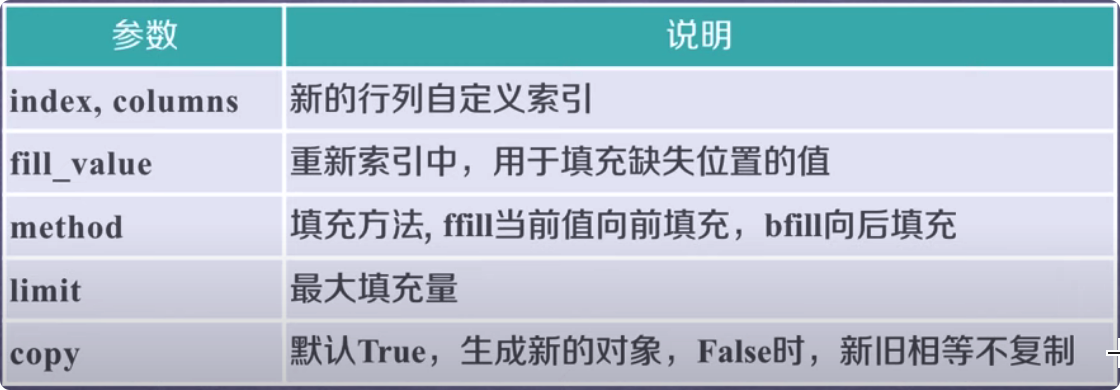

In [65]:
d2.reindex(index=['d','c','b','a'],columns=['two','one'])

,two,one
d,6,4
c,7,3
b,8,2
a,9,1


In [76]:
newc = d2.columns.insert(3,'three')

In [78]:
d2.reindex(columns=newc,fill_value=10)

,one,two,three
a,1,9,10
b,2,8,10
c,3,7,10
d,4,6,10


## 索引类型

In [79]:
d2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [80]:
d2.columns

Index(['one', 'two'], dtype='object')

Series和DataFrame的索引类型都是Index

### 索引类型的常用方法

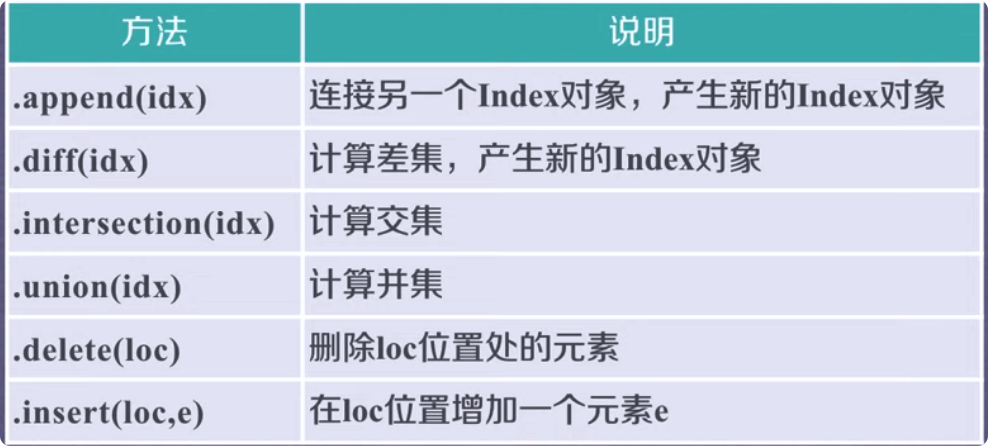

### 删除Series和DataFrame指定行或列索引

In [84]:
d2.drop(['b','c']) #注意多个的话要将index放在列表里

,one,two
a,1,9
d,4,6


In [85]:
d2.drop('d') # 单个则不用放列表

,one,two
a,1,9
b,2,8
c,3,7


In [87]:
d2.drop('two',axis=1) #默认axis=0，0指的是纵轴，1指的是横轴

,one
a,1
b,2
c,3
d,4


## 数据类型运算

算术运算法则  
算术运算根据行列索引,补齐后运算,运算默认产生浮点数。  
补齐时缺项填充NaN(空值)，NaN与任何值相计算，还是NaN  
维和一维、一维和零维间为广播运算  
采用+-*/符号进行的二元运算产生新的对象  

In [89]:
d1

,one,two
a,1.0,9
b,2.0,8
c,3.0,7
d,NaN,6


In [106]:
d3 = d2

In [112]:
d3.index = ['q','a','z','w']
d3

,one,two
q,1,9
a,2,8
z,3,7
w,4,6


In [113]:
d1 - d3

,one,two
a,-1.0,1.0
b,NaN,NaN
c,NaN,NaN
d,NaN,NaN
q,NaN,NaN
w,NaN,NaN
z,NaN,NaN


In [119]:
d1.sub(d3,axis=1,fill_value=10)

,one,two
a,-1.0,1.0
b,-8.0,-2.0
c,-7.0,-3.0
d,NaN,-4.0
q,9.0,1.0
w,6.0,4.0
z,7.0,3.0


In [131]:
d1 > d2

,one,two
a,False,False
b,False,False
c,False,False
d,False,False


In [133]:
d1 == d2

,one,two
a,True,True
b,True,True
c,True,True
d,True,True


## 数据排序

`.sort_index(axis=0,ascending=True)`

In [137]:
d2.sort_index(ascending=False) # NaN会统一放到排序末尾

,one,two
d,4,6
c,3,7
b,2,8
a,1,9


In [144]:
d2.sort_values('two',ascending=True)

,one,two
d,4,6
c,3,7
b,2,8
a,1,9


## 基本的统计分析函数

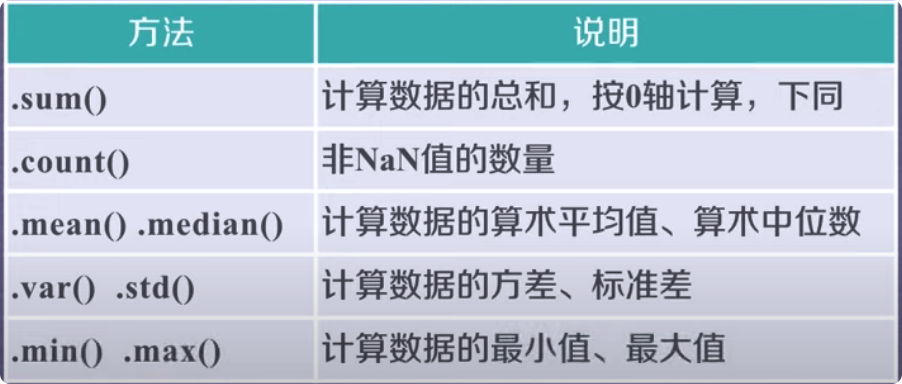

.describe                    针对0轴（各列）的统计汇总

### Series.describe

In [146]:
a = pd.Series([9,8,7,6],index=['a','b','c','d'])

In [147]:
a

a    9
b    8
c    7
d    6
dtype: int64

In [151]:
a.describe()

count    4.000000
mean     7.500000
std      1.290994
min      6.000000
25%      6.750000
50%      7.500000
75%      8.250000
max      9.000000
dtype: float64

In [150]:
type(a.describe())

pandas.core.series.Series

### DataFrame.describe

In [153]:
c = pd.DataFrame(np.arange(20).reshape(4,5),index=['c','a','d','b'])

In [154]:
c.describe()

,0,1,2,3,4
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,7.500000,8.500000,9.500000,10.500000,11.500000
std,6.454972,6.454972,6.454972,6.454972,6.454972
min,0.000000,1.000000,2.000000,3.000000,4.000000
25%,3.750000,4.750000,5.750000,6.750000,7.750000
50%,7.500000,8.500000,9.500000,10.500000,11.500000
75%,11.250000,12.250000,13.250000,14.250000,15.250000
max,15.000000,16.000000,17.000000,18.000000,19.000000


In [155]:
type(c.describe())

pandas.core.frame.DataFrame

In [158]:
c.describe().loc['max']

0    15.0
1    16.0
2    17.0
3    18.0
4    19.0
Name: max, dtype: float64

## 数据的累计统计分析

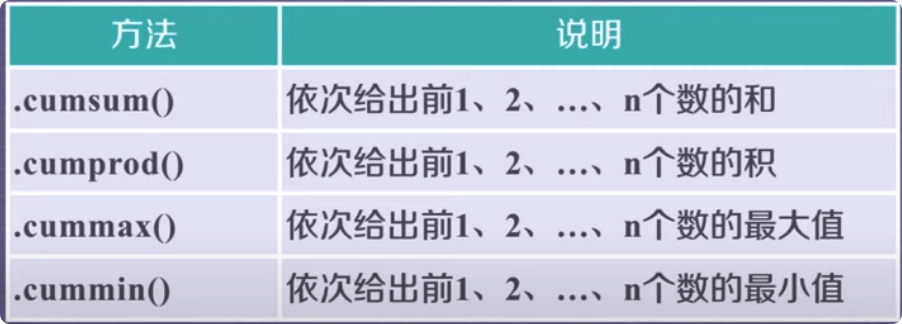

In [159]:
e = pd.DataFrame(np.arange(20).reshape(4,5),index=['c','a','d','b'])

In [160]:
e

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


In [161]:
e.cumsum()

,0,1,2,3,4
c,0,1,2,3,4
a,5,7,9,11,13
d,15,18,21,24,27
b,30,34,38,42,46


In [162]:
e.cumprod()

,0,1,2,3,4
c,0,1,2,3,4
a,0,6,14,24,36
d,0,66,168,312,504
b,0,1056,2856,5616,9576


In [163]:
e.cummax()

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


In [164]:
e.cummin()

,0,1,2,3,4
c,0,1,2,3,4
a,0,1,2,3,4
d,0,1,2,3,4
b,0,1,2,3,4


### 滚动计算（窗口计算）

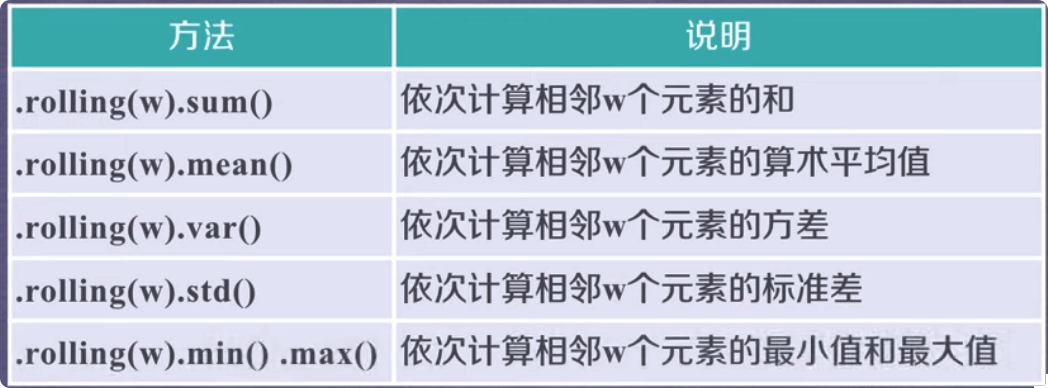

In [166]:
e

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


In [165]:
e.rolling(2).sum()

,0,1,2,3,4
c,NaN,NaN,NaN,NaN,NaN
a,5.0,7.0,9.0,11.0,13.0
d,15.0,17.0,19.0,21.0,23.0
b,25.0,27.0,29.0,31.0,33.0


### 相关分析

In [ ]:
.cov() #计算协方差矩阵

In [ ]:
.corr() #计算相关系数矩阵，Pearson、Spearman、Kendall等系数

In [169]:
hprice = pd.Series([3.04,22.93,12.75,22.6,12.33],index=['2008','2009','2010','2011','2012'])

In [171]:
hprice

2008     3.04
2009    22.93
2010    12.75
2011    22.60
2012    12.33
dtype: float64

In [172]:
m2 = pd.Series([8.18,18.38,9.13,7.82,6.69],index=['2008','2009','2010','2011','2012'])

In [173]:
m2

2008     8.18
2009    18.38
2010     9.13
2011     7.82
2012     6.69
dtype: float64

In [174]:
hprice.corr(m2) #值会在[-1,1]之间，越靠近0越无关

0.5239439145220387